Top 5 predictions for the wolf image:
Label: timber_wolf | Confidence: 0.9598718285560608
Label: red_wolf | Confidence: 0.02345939353108406
Label: coyote | Confidence: 0.010895656421780586
Label: dingo | Confidence: 0.0034012936521321535
Label: white_wolf | Confidence: 0.0015540611930191517

Top 5 predictions for the apple image:
Label: Granny_Smith | Confidence: 0.9942532181739807
Label: candle | Confidence: 0.0055453903041779995
Label: orange | Confidence: 1.7446582205593586e-05
Label: bell_pepper | Confidence: 1.0578819455986377e-05
Label: banana | Confidence: 9.836808203544933e-06


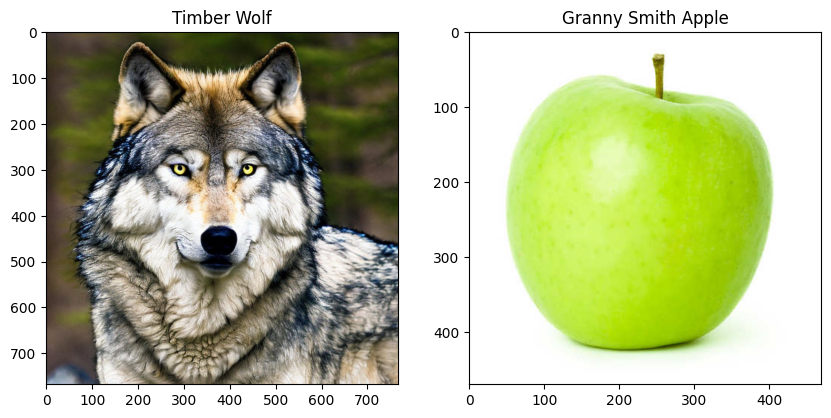

In [14]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import json
class_idx = json.load(open("imagenet_class_index.json"))


# Load a pre-trained model inception v3 and use the apth image as input

model = models.inception_v3(pretrained=True)
model.eval()

# Load the image
img_apple = Image.open("granny_smith.jpg")


# Preprocess the image
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor(),
])

img_tensor_apple = preprocess(img_apple)

# Add a dimension to the image tensor

img_tensor_apple.unsqueeze_(0)

# Get the class labels

with open("imagenet_class_index.json") as f:
    class_idx = json.load(f)






# Get the class labels for the image

output_apple = model(img_tensor_apple)

# Get the top 5 predictions

_, indices_apple = torch.sort(output_apple, descending=True)

# Print the top 5 predictions








#Rpeat the procvess for the wolf image

img_wolf = Image.open("timber_wolf.jpg")

# Preprocess the image

img_tensor_wolf = preprocess(img_wolf)

# Add a dimension to the image tensor

img_tensor_wolf.unsqueeze_(0)

# Get the class labels for the image

output_wolf = model(img_tensor_wolf)

# Get the top 5 predictions

_, indices_wolf = torch.sort(output_wolf, descending=True)

# Print the top 5 predictions


#plot the wolf and apple images


#Print the tok k predictions for the wolf and apple images 

print("Top 5 predictions for the wolf image:")
for idx in indices_wolf[0][:5]:
    print("Label: {} | Confidence: {}".format(class_idx[str(idx.item())][1], torch.softmax(output_wolf, dim=1)[0, idx].item()))

print("\nTop 5 predictions for the apple image:")
for idx in indices_apple[0][:5]:
    print("Label: {} | Confidence: {}".format(class_idx[str(idx.item())][1], torch.softmax(output_apple, dim=1)[0, idx].item()))

    



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
ax1.imshow(img_wolf)
ax1.set_title("Timber Wolf")
ax2.imshow(img_apple)
ax2.set_title("Granny Smith Apple")
plt.show()



In [21]:
for idx in indices_wolf[0][:5]:
    print(torch.softmax(output_wolf, dim=1)[0][idx].item())

0.9598718285560608
0.02345939353108406
0.010895656421780586
0.0034012936521321535
0.0015540611930191517
